In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

from PIL import Image, ImageDraw


In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#AJ
import matplotlib.pyplot as plt 


In [ ]:
#AJ

In [ ]:
#AJ

In [ ]:
#AJ

In [ ]:
#AJ

In [ ]:
#AJ

In [28]:
def affiche(n):
    label = df['label'][n]
    image =  df.iloc[n].drop('label')
    # Print label
    print("Chiffre : ",label)
    # Print the image
    plt.imshow(np.array(image).reshape((28,28)), cmap='Greys_r')

Chiffre :  0


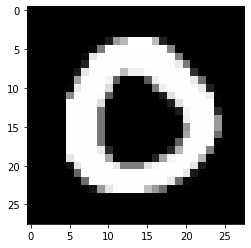

In [29]:
affiche(4)

In [35]:
def affiche9(n):
    fig = plt.figure()
    for i in range(9):
        image =  df.iloc[n+i].drop('label')
        fig.add_subplot(331+i)
        plt.imshow(np.array(image).reshape((28,28)), cmap='Greys_r')

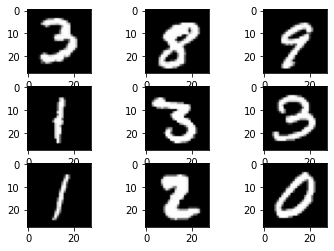

In [37]:
affiche9(9)

In [ ]:
#EB

In [ ]:
#EB

In [ ]:
#EB

In [ ]:
#EB